In [8]:
from keras.utils import to_categorical, load_img
# from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [9]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [17]:
def createdataframe(dir):
    images_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            images_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return images_paths, labels

In [18]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [19]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [20]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [25]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [26]:
from tqdm.notebook import tqdm

In [27]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [28]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\HP SPECTRE\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [30]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [31]:
X_train = train_features/255.0
X_test = test_features/255.0

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [35]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [36]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [38]:
model = Sequential()
# convolution layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(7, activation='softmax'))

In [40]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [42]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=100, validation_data = (X_test, y_test))


Epoch 1/100
226/226 [==============================] - 504s 2s/step - loss: 1.8234 - accuracy: 0.2441 - val_loss: 1.8100 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 1793s 8s/step - loss: 1.7934 - accuracy: 0.2522 - val_loss: 1.7455 - val_accuracy: 0.2884
Epoch 3/100
226/226 [==============================] - 968s 4s/step - loss: 1.6991 - accuracy: 0.3097 - val_loss: 1.5530 - val_accuracy: 0.3947
Epoch 4/100
226/226 [==============================] - 871s 4s/step - loss: 1.5661 - accuracy: 0.3839 - val_loss: 1.4587 - val_accuracy: 0.4393
Epoch 5/100
226/226 [==============================] - 650s 3s/step - loss: 1.4837 - accuracy: 0.4216 - val_loss: 1.3603 - val_accuracy: 0.4725
Epoch 6/100
226/226 [==============================] - 462s 2s/step - loss: 1.4223 - accuracy: 0.4511 - val_loss: 1.3333 - val_accuracy: 0.4833
Epoch 7/100
226/226 [==============================] - 412s 2s/step - loss: 1.3868 - accuracy: 0.4668 - val_loss: 1.2889 - val_accuracy

226/226 [==============================] - 384s 2s/step - loss: 0.9281 - accuracy: 0.6540 - val_loss: 1.0392 - val_accuracy: 0.6189
Epoch 58/100
226/226 [==============================] - 395s 2s/step - loss: 0.9155 - accuracy: 0.6568 - val_loss: 1.0290 - val_accuracy: 0.6271
Epoch 59/100
226/226 [==============================] - 386s 2s/step - loss: 0.9206 - accuracy: 0.6574 - val_loss: 1.0345 - val_accuracy: 0.6272
Epoch 60/100
226/226 [==============================] - 385s 2s/step - loss: 0.9188 - accuracy: 0.6613 - val_loss: 1.0334 - val_accuracy: 0.6255
Epoch 61/100
226/226 [==============================] - 390s 2s/step - loss: 0.9056 - accuracy: 0.6627 - val_loss: 1.0316 - val_accuracy: 0.6231
Epoch 62/100
226/226 [==============================] - 396s 2s/step - loss: 0.9017 - accuracy: 0.6667 - val_loss: 1.0305 - val_accuracy: 0.6245
Epoch 63/100
226/226 [==============================] - 394s 2s/step - loss: 0.8939 - accuracy: 0.6675 - val_loss: 1.0290 - val_accuracy: 0.623

In [44]:
model_json = model.to_json()
with open("emotiondetector.json", "w") as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [45]:
from keras.models import model_from_json

In [46]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [47]:
label = ['angry', 'disgut', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [50]:
def ef(image):
    img = load_img(image, grayscale = True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature/255.0

In [51]:
image = 'images/train/angry/22.jpg'
print("ori img is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print('model pred is ', pred_label)

ori img is of angry
1/1 [==============================] - 0s 110ms/step
model pred is  angry


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

ori img is sad
1/1 [==============================] - 0s 23ms/step
model pred is  sad


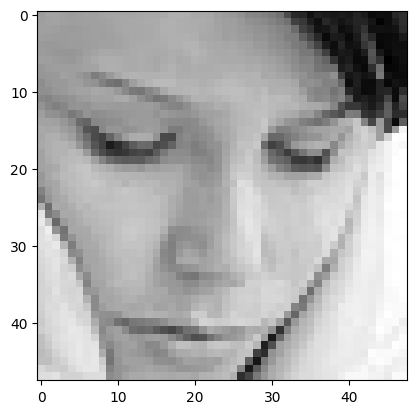

In [57]:
image = 'images/train/sad/42.jpg'
print('ori img is sad')
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model pred is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap = "gray")